<a href="https://colab.research.google.com/github/marrs-lab/ocean_color/blob/main/mean_cosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is the mean cosine of a radiance distribution?

"The mean cosine of the radiance distribution:  The average cosine of the polar angle of all the radiance propagation direction; it equals the ratio of the net plane irradiance to the total scalar irradiance. The mean cosine is zero for an isotropic radiance distribution. Nondimensional." 

and 

"The mean cosine of the downward (upward) radiance:  The average cosine of the nadir (zenith) angle of all downward (upward) traveling photons; it equals the ratio of the plane irradiance to the scalar irradiance for the downward (upward) direction. The average cosines are AOPs. Nondimensional." 

via https://www.oceanopticsbook.info/view/references/brief-definitions.

In [1]:
import numpy as np
import math
from numpy import linalg, newaxis, random
from matplotlib import collections
import matplotlib.pyplot as plt

First let's generate 1000 of vectors of length 1 randomly and uniformly selected going to a central point (0,0). The blue lines are the light vectors and the black thicker line is the mean cosine of this distribution.

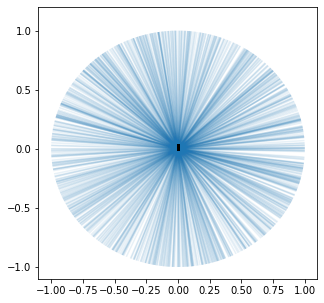

In [2]:
def gen_rand_vecs(dims, number):
    vecs = random.normal(size=(number,dims))
    mags = linalg.norm(vecs, axis=-1)

    return vecs / mags[..., newaxis]

ends = gen_rand_vecs(2, 1000)

# Add 0 vector to start
vectors = np.insert(ends[:, newaxis], 0, 0, axis=1)

# to get the mean cosine we can just grab the y component of these vectors since this is a unit circle
# the y component is just the 
mean_cos = np.mean(vectors[:,1,1])

figure, axis = plt.subplots(figsize=(5,5))

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)
axis.add_collection(collections.LineCollection(vectors, alpha=0.1))
axis.axis((-1.1, 1.1, -1.1, 1.2))
plt.show()

In [3]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.03587659501059126


Let's only look at the downward vectors going to this point as an example of downward irradiance (Ed).

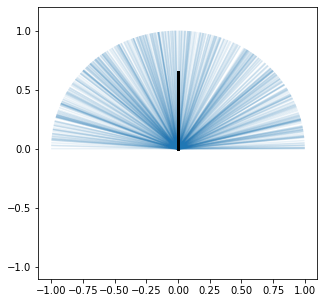

In [4]:
downward_vecs = vectors[vectors[:,1,1]>0]
# sort them so we can grab them with a probability distribution
downward_vecs_sort = downward_vecs[downward_vecs[:, 1,0].argsort()]

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort, alpha=0.1))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(downward_vecs_sort[:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)
# axis.plot([0,0.6394233792175309],[0,np.arccos(0.6394233792175309)],color='black', linewidth=3)
plt.show()

In [5]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.6472607038425371


Now let's create some probability distributions so that we grab vectors based on some likelihood

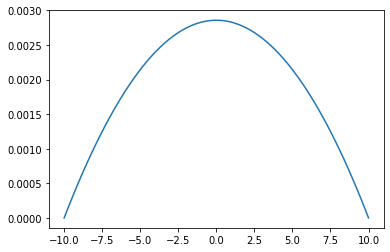

In [6]:
# create len(downward_vecs_sort) equally spaced points between -10 and 10
x = np.linspace(-10, 10, len(downward_vecs_sort))

# calculate the y value for each element of the x vector
y = -x**2/100+1

# Normalize it so that is can be used as a probability distribution.
prob_dist = y/y.sum()

fig, ax = plt.subplots()
ax.plot(x, prob_dist)

Grab 10,000 samples with replacement based on this distribution

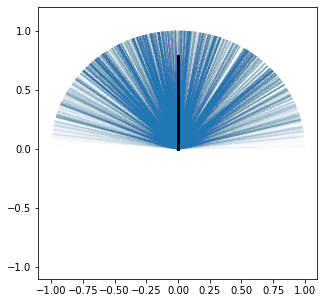

In [7]:
from numpy.random import choice
idxs = []
for i in range(10000):
  idxs.append(choice(np.arange(0,len(downward_vecs_sort),1), p=prob_dist))
  
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort[idxs],alpha=0.01))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(downward_vecs_sort[idxs,1,1])
axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)
plt.show()

In [8]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.7843822346939684


### Make a more realistic distribution

Thisis just based on an 

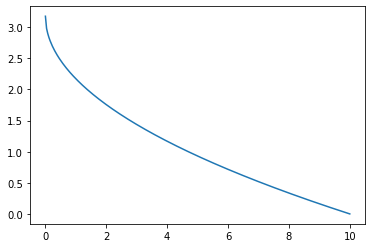

In [9]:
# create len(downward_vecs_sort)/2 equally spaced points between -10 and 10
x = np.linspace(0, 10, int(len(downward_vecs_sort)/2))

# calculate the y value for each element of the x vector
y = -x**(0.5)+3.17

fig, ax = plt.subplots()
ax.plot(x, y)

In [10]:
min(y)

0.007722339831620406

In [11]:
peaked_dist = np.hstack((np.flip(y),y))

Normalize it so that is can be used as a probability distribution.

In [12]:
peaked_prob_dist = peaked_dist/peaked_dist.sum()

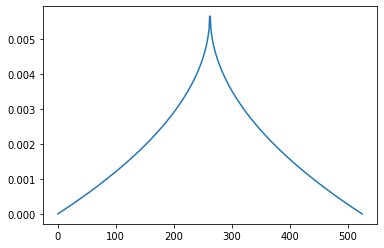

In [13]:
plt.plot(peaked_prob_dist)

Now grab the vectors from this distribution.

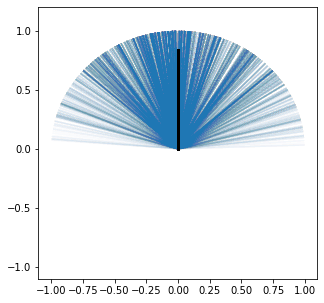

In [17]:
idxs = []
for i in range(10000):
  idxs.append(choice(np.arange(0,len(downward_vecs_sort),1), p=peaked_prob_dist))
  
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(downward_vecs_sort[idxs],alpha=0.01))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(downward_vecs_sort[idxs,1,1])
axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

plt.show()

In [18]:
print('The mean cosine of this distribution is: ', mean_cos)

The mean cosine of this distribution is:  0.8397302611014938


Then some more extreme examples where we just subset the vector set:

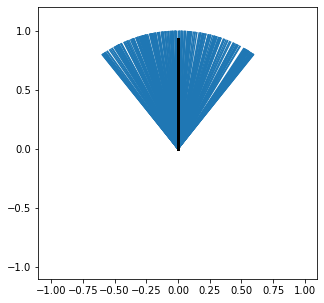

The mean cosine of this distribution is:  0.932058761306921


In [19]:
figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors[vectors[:,1,1]>.8]))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(vectors[vectors[:,1,1]>.8][:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

plt.show()

print('The mean cosine of this distribution is: ', mean_cos)

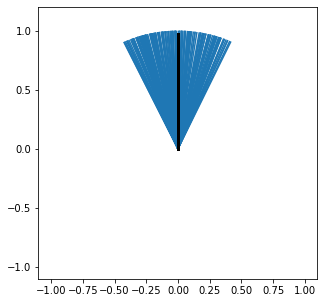

The mean cosine of this distribution is:  0.9698881864849758


In [20]:

figure, axis = plt.subplots(figsize=(5,5))
axis.add_collection(collections.LineCollection(vectors[vectors[:,1,1]>.9]))
axis.axis((-1.1, 1.1, -1.1, 1.2))

mean_cos = np.mean(vectors[vectors[:,1,1]>.9][:,1,1])

axis.plot([0,0],[0,mean_cos],color='black', linewidth=3)

plt.show()

print('The mean cosine of this distribution is: ', mean_cos)